# Handwritten Digit Classification (Basic)

Required: keras, numpy, matplotlib

In [1]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

### Load the MNIST dataset from Keras's inbuilt database


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


### Examine the size and image dimensions
MNIST database of handwritten digits consists of 60,000 28x28 grayscale images of 10 digits along with a test set of 10,000 images

In [3]:
print("Dimension of x_train : " + str(x_train.shape))
print("Dimension of y_train : " + str(y_train.shape))
print()
print("Dimension of x_test  : " + str(x_test.shape))
print("Dimension of y_test  : " + str(y_test.shape))
print()
print("Number of samples in our training data: " + str(len(x_train)))
print("Number of lables in our training data : " + str(len(y_train)))
print("Number of samples in our test data    : " + str(len(x_test)))
print("Number of lables in our test data     : " + str(len(y_test)))
print()
print("Dimension of each image in the training set: " + str(x_train[0].shape))
print("Dimension of each image in the test set    : " + str(x_train[0].shape))
print()
print("Dimension of each label in the training set: " + str(y_train[0].shape))
print("Dimension of each label in the test set    : " + str(y_test[0].shape))

Dimension of x_train : (60000, 28, 28)
Dimension of y_train : (60000,)

Dimension of x_test  : (10000, 28, 28)
Dimension of y_test  : (10000,)

Number of samples in our training data: 60000
Number of lables in our training data : 60000
Number of samples in our test data    : 10000
Number of lables in our test data     : 10000

Dimension of each image in the training set: (28, 28)
Dimension of each image in the test set    : (28, 28)

Dimension of each label in the training set: ()
Dimension of each label in the test set    : ()


### Look at some images in the dataset
1. Using OpenCV
2. Using Matplotlib

In [4]:
# Using OpenCV
import cv2
import numpy as np

for i in range(0, 6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    window_name = 'Random Sample #' + str(i + 1)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

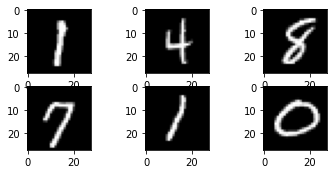

In [13]:
# Using Matplotlib
import matplotlib.pyplot as plt

for i in range(1, 7):
    # Subplot's arguments are nrows, ncols,, index
    plt.subplot('33' + str(i))
    random_num = np.random.randint(0, len(x_train))
    plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))
    
plt.show()

### Prepare the dataset for training

In [20]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Keras requires the fourth dimension as the colour depth, 3 for RGB
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# The shape of a single image
input_shape = (img_rows, img_cols, 1)

# Convert the image type from unit8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the dataset, the range is reduced to (0, 1) from (0, 255)
x_train /= 255
x_test /= 255

print("Dimension of x_train: ", x_train.shape)
print("Dimension of x_test : ", x_test.shape)

print()
print("Number of training samples: ", x_train.shape[0])
print("Number of test samples    : ", x_test.shape[0])

Dimension of x_train:  (60000, 28, 28, 1)
Dimension of x_test :  (10000, 28, 28, 1)

Number of training samples:  60000
Number of test samples    :  10000


### One Hot Encoding of Labels

In [26]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('Number of classes: ' + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of classes: 10


### Create our Model

In [ ]:
import keras
from keras.dataswets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, Maxpooling2D
from keras import backend as K
from keras.optimizers import SGD